# Homework 4: Preprocessing 

## Introduction

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')



## Exercise A: Introducing the dataset
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). 
Download the CSV and save it as `adult.csv` under this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [2]:
census_df = pd.read_csv("adult.csv")
census_df.shape

(32561, 15)

### Data splitting 
rubric={points:5}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (80%) and `test_df` (20%) with `random_state = 24`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 80%/20% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_

In [3]:
train_df = None
test_df = None

# BEGIN YOUR CODE HERE
train_df, test_df = train_test_split(census_df, test_size=0.20, random_state=24)
train_df
# END YOUR CODE HERE

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
20823,31,Private,109917,7th-8th,4,Separated,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
21955,41,Private,287037,Some-college,10,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
688,37,Private,193855,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,50,United-States,<=50K
14876,50,Private,237819,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
26491,41,Private,173858,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,China,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,56,Private,91545,10th,6,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,36,United-States,<=50K
24919,46,State-gov,247992,7th-8th,4,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
14528,35,Local-gov,45607,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,>50K
899,28,Local-gov,154863,HS-grad,9,Never-married,Protective-serv,Other-relative,Black,Male,0,1876,40,United-States,<=50K


## Exercise B: Exploratory data analysis (EDA)
<hr>

Let's examine our `train_df`. 

In [4]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [5]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(26048, 15)

In [6]:
train_df_nan.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with `NaN` values. 

### Visualizing features
rubric={points:10}

#### Task B1
rubric={points:4}

`display` the information given by `train_df_nan.info()` and `train_df_nan.describe()` methods. 
In the case of `.describe()`, you can **optimally** use the `include="all"` argument to show summary statistics of all  features. 

In [7]:
# BEGIN YOUR CODE HERE
display(train_df_nan.info())
display(train_df_nan.describe(include="all"))
# END YOUR CODE HERE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 20823 to 12706
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       24568 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education.num   26048 non-null  int64 
 5   marital.status  26048 non-null  object
 6   occupation      24564 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital.gain    26048 non-null  int64 
 11  capital.loss    26048 non-null  int64 
 12  hours.per.week  26048 non-null  int64 
 13  native.country  25586 non-null  object
 14  income          26048 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.2+ MB


None

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,26048.000000,24568,2.604800e+04,26048,26048.000000,26048,24564,26048,26048,26048,26048.000000,26048.000000,26048.000000,25586,26048
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,18179,NaN,8437,NaN,11991,3307,10576,22227,17470,NaN,NaN,NaN,23371,19755
mean,38.591677,NaN,1.896370e+05,NaN,10.090295,NaN,NaN,NaN,NaN,NaN,1080.957885,89.201052,40.431549,NaN,NaN
std,13.631118,NaN,1.056490e+05,NaN,2.560870,NaN,NaN,NaN,NaN,NaN,7379.583044,407.430432,12.306181,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175830e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783545e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.374370e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Task B2 
rubric={points:6}

Visualize the histograms of numeric features 

Hint: use `dataframe.hist` to show the distribution of six numeric features.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

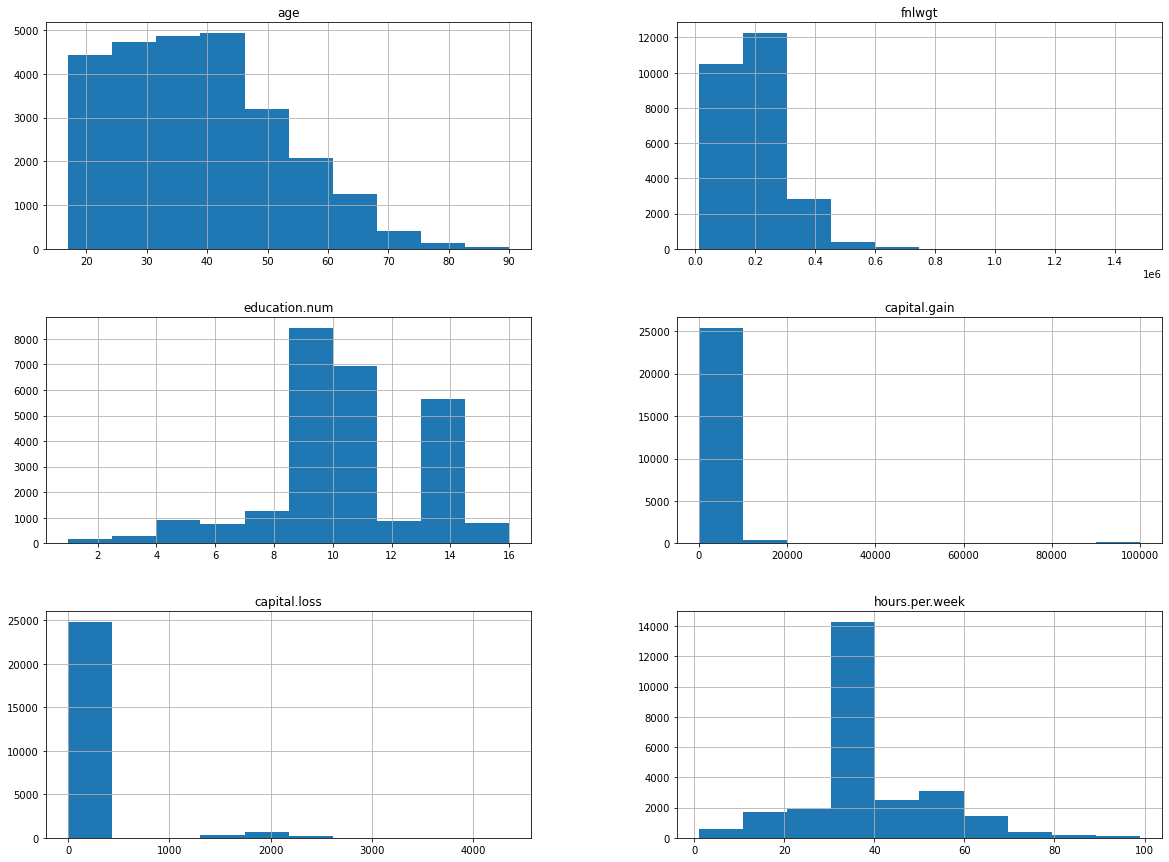

In [8]:
# BEGIN YOUR CODE HERE
train_df_nan.hist(figsize = (20,15))

# END YOUR CODE HERE

#### Task B3
rubric={points:4}

From the visualizations, which features seem relevant for the given prediction task?(You can pick multi-features).

For predicting whether a person earns more than 50K per year, the age, education, and hours per week features are likely the most relevant.

### Identify transformations to apply

rubric={points:20}


#### Task B4
rubric={points:13}

Identify what kind of feature transformations (`scaling`, `imputation`, `one hot encoding`) you would apply on each column in the dataset and fill in the table below accordingly. You may decide to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. 

As an example, we use imputation and One-Hot encoding for feature `occupation` here.

| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, One-Hot Encoding |
| age | |
| workclass |  |
| fnlwgt | |
| education ||
| education.num |  |
| marital.status |  |
| relationship |  |
| race | |
| sex |  |
| capital.gain | |
| capital.loss |  |
| hours.per.week |  |
| native.country |  |


| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, One-Hot Encoding |
| age | scaling|
| workclass | imputation, One-Hot Encoding |
| fnlwgt | scaling |
| education |One-Hot Encoding|
| education.num | Scaling |
| marital.status | One-Hot Encoding |
| relationship | One-Hot Encoding |
| race | Drop|
| sex | One-Hot Encoding |
| capital.gain | scaling |
| capital.loss | scaling |
| hours.per.week | scaling |
| native.country | imputation, One-Hot Encoding |


#### Task B5
rubric={points:5}

Identify different feature types for applying different transformations. 
In particular, fill in the lists below.

Hint:
1. This dataset is very special - the features with missing values are categorical. So we don't create a list for `imputation_features`.

In [9]:
# It's OK to keep some of the lists empty or add new lists.
numeric_features = [] 
categorical_features = [] 
ordinal_features = [] 
binary_features = [] 
drop_features = []  # do not include these features in modeling
passthrough_features = [] # do not apply any transformation

# Example: numeric_features = ["age"] 
# BEGIN YOUR CODE HERE
numeric_features = ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"] 
categorical_features = ["occupation","workclass","education","marital.status","relationship","sex","native.country"] 
ordinal_features = [] 
binary_features = [] 
drop_features = ["race"] 

# END YOUR CODE HERE

target = "income"


#### Task B6
rubric={points:2}

Is including the `race` feature for predicting income ethically a good idea? Briefly discuss.

Hint:
1. This question is a bit open-ended and there is no single correct solution.

It can be a good idea as understanding how all the features affect the data is important. Data and statistics can be used to prove or disprove certain ideas so it shouldn't be always excluded.

### Separating feature vectors and targets  
rubric={points:6}

<br>

#### Task B7
rubric={points:4}

Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`.

Hint:
1. `income` is the target.
2. The rest are considered as features.

In [10]:
# Split the dataset, feature/target:
# BEGIN YOUR CODE HERE
X_train, y_train = (train_df_nan.drop(columns=["income"]), train_df_nan["income"])
X_test, y_test = (test_df_nan.drop(columns=["income"]), test_df_nan["income"]) 

# END YOUR CODE HERE

#### Task B8
rubric={points:2}

At this point, if you train kNN model on `X_train` and `y_train`, would it work? Why or why not?

No, without imputation, the missing data will cause errors. 

## Exercise C: Preprocessing
<hr>

### Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`
rubric={points:18}

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that you can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly you can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

You may use the method of your choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

#### Task C1 
rubric={points:10}

Create a column transformer `preprocessor` based on transformations you want to apply on the data from [Task B5](#Task-B5).

Hint
1. There are several features with missing values. Fortunately, they are categorical features.
2. Don't forget add `SimpleImputer(strategy='most_frequent')` and `OneHotEncoder` for your `categorical_features`.
3. You can use `make_pipeline` to combine `SimpleImputer` and `OneHotEncoder`.

In [11]:
preprocessor = None
# BEGIN YOUR CODE HERE
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling on numeric features
    (make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder()), categorical_features),  # OHE on categorical features
    ("drop", drop_features),  # drop the drop features
)
preprocessor
# END YOUR CODE HERE

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'fnlwgt', 'education.num',
                                  'capital.gain', 'capital.loss',
                                  'hours.per.week']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['occupation', 'workclass', 'education',
                                  'marital.status', 'relationship', 'sex',
                                  'native.country']),
                                ('drop', 'drop', ['race'])])

#### Task C2 
rubric={points:4}

Transform the data by calling `fit_transform` on the training set. 
Then **print** or **display** the shape of the transformed data.

In [12]:
# BEGIN YOUR CODE HERE
X_transformed = preprocessor.fit_transform(X_train)
display(X_transformed)
# END YOUR CODE HERE

<26048x100 sparse matrix of type '<class 'numpy.float64'>'
	with 338624 stored elements in Compressed Sparse Row format>

#### Task C3
rubric={points:4}


Why do we need to use a column transformer in this case? Briefly explain.

Since we have a dataset that contains a mixture of categorical and numerical columns, a column transformer is good for addressing all the data at the same time and can be easily applied to new data.

## Exercise D: Building models
<hr>

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Feel free to use it to keep track of your results if you like. 

In [13]:
results_dict = {} # dictionary to store all the results

In [14]:

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

### Baseline model 
rubric={points:6}

#### Task D1
rubric={points:3}

Define a **pipeline** with two steps: `preprocessor` from [Task C2](Task-C2) and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier.

In [15]:
# BEGIN YOUR CODE HERE
pipe = make_pipeline(preprocessor,DummyClassifier(strategy="prior"))
pipe
# END YOUR CODE HERE

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['occupat

#### Task D2
rubric={points:3}

Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict['dummy]` above. 

> You may use the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [16]:
results_dict["dummy"] = None
# BEGIN YOUR CODE HERE
results_dict["dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, cv=5)

# END YOUR CODE HERE

Now let us show the results.

In [17]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.098 (+/- 0.039),0.091 (+/- 0.150),0.758 (+/- 0.000),0.758 (+/- 0.000)


### Trying different classifiers
rubric={points:12}

#### Task D3
rubric={points:5}

For each of the models (`DecisionTreeClassifier` and `KNeighborsClassifier`) in the starter code below:

- Define a pipeline with two steps: `preprocessor` from [Task C2](#Task-C2) and the model as your classifier. 
- Carry out 5-fold cross-validation with the pipeline.  
- Store the results in `results_dict`. 
    

In [18]:
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
}

In [19]:
np.random.seed(12345)
# BEGIN YOUR CODE HERE
results_dict["decision tree"] = None
results_dict["kNN"] = None
pipe1 = make_pipeline(preprocessor,models["decision tree"])
results_dict["decision tree"] = mean_std_cross_val_scores(pipe1, X_train, y_train, return_train_score=True, cv=5)
print("Done")
pipe2 = make_pipeline(preprocessor,models["kNN"])
results_dict["kNN"] = mean_std_cross_val_scores(pipe2, X_train, y_train, return_train_score=True, cv=5)
print("Done")



# END YOUR CODE HERE

Done
Done


#### Task D4
rubric={points:2}

Display all the results so far as a pandas dataframe.

In [20]:
# BEGIN YOUR CODE HERE
pd.DataFrame(results_dict).T

# END YOUR CODE HERE

,fit_time,score_time,test_score,train_score
dummy,0.098 (+/- 0.039),0.091 (+/- 0.150),0.758 (+/- 0.000),0.758 (+/- 0.000)
decision tree,0.947 (+/- 0.128),0.025 (+/- 0.010),0.815 (+/- 0.004),1.000 (+/- 0.000)
kNN,0.093 (+/- 0.021),4.676 (+/- 2.676),0.831 (+/- 0.003),0.883 (+/- 0.002)


### Exploring importance of scaling
rubric={points:10}

In this exercise you'll examine whether scaling helps in case of KNNs. 

#### Task D6
rubric={points:4}

Create a column transformer **without** the `StandardScaler` step for `numeric_features`. 
You can refer your to [Task C1](#Task-C1).

In [21]:
# BEGIN YOUR CODE HERE
preprocessor = make_column_transformer(
#    (StandardScaler(), numeric_features),  # scaling on numeric features
    (make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder()), categorical_features),  # OHE on categorical features
    ("drop", drop_features),  # drop the drop features
)
preprocessor

# END YOUR CODE HERE

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['occupation', 'workclass', 'education',
                                  'marital.status', 'relationship', 'sex',
                                  'native.country']),
                                ('drop', 'drop', ['race'])])

#### Task D7
rubric={points:4}

Repeat the steps in [Task D3](#Task-D3) with this new column transformer. Save all results in `results_dic_compare`.

In [22]:
np.random.seed(12345)
results_dict_compare = {}  # dictionary to store all the results

# BEGIN YOUR CODE HERE
results_dict_compare["decision tree"] = None
results_dict_compare["kNN"] = None
pipe1 = make_pipeline(preprocessor,models["decision tree"])
results_dict_compare["decision tree"] = mean_std_cross_val_scores(pipe1, X_train, y_train, return_train_score=True, cv=5)
print("Done")
pipe2 = make_pipeline(preprocessor,models["kNN"])
results_dict_compare["kNN"] = mean_std_cross_val_scores(pipe2, X_train, y_train, return_train_score=True, cv=5)
print("Done")


# END YOUR CODE HERE

Done
Done


In [23]:
pd.DataFrame(results_dict_compare).T # compare the result with the outcome without doing feature scaling   

,fit_time,score_time,test_score,train_score
decision tree,0.323 (+/- 0.005),0.016 (+/- 0.003),0.815 (+/- 0.001),0.860 (+/- 0.001)
kNN,0.079 (+/- 0.015),4.260 (+/- 2.388),0.805 (+/- 0.006),0.828 (+/- 0.005)


#### Task D8
rubric={points:2}

Compare the results of scaled numeric features with unscaled numeric features. 
1. Is scaling necessary for decision trees? (Yes/No)
2. Is scaling necessary for knn? (Yes/No)

1) No, the test score did not change.
2) Yes, the test score change since the largest values will dominate the knn process.

### Hyperparameter optimization
rubric={points:8}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `n_neighbors` of KNeighborsClassifier. 
In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. 
For the purpose of this assignment, we'll only do it for the K Neighbors classifier with one hyperparameter: `n_neighbors`. 

#### Task D9
rubric={points:4}

For each `n_neighbors` value in the `param_grid` in the starter code below: 
- Create a pipeline object with two steps: `preprocessor` from [Task C1](#Task-C1) and KNeighbors classifier with the value of `n_neignbors`.
- Carry out 5-fold cross validation with the pipeline using the function `mean_std_cross_val_scores`.  
- Store the results in `results_dict_hyper` where the key is the `n_neignbors` value and the value is times and scores.
- This step take a few minutes as you are training 4 knn models with 5 fold cross-validation.
- Display results as a pandas DataFrame.
    

In [24]:
param_grid = [2, 3, 4, 5]
param_grid

[2, 3, 4, 5]

In [25]:
results_dict_hyper = {}

# BEGIN YOUR CODE HERE
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling on numeric features
    (make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder()), categorical_features),  # OHE on categorical features
    ("drop", drop_features),  # drop the drop features
)
results_dict_hyper["2_neighbors"] = None
results_dict_hyper["3_neighbors"] = None
results_dict_hyper["4_neighbors"] = None
results_dict_hyper["5_neighbors"] = None
names = ["2_neighbors","3_neighbors","4_neighbors","5_neighbors"]
i = 0
for k in param_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = make_pipeline(preprocessor,knn)
    results_dict_hyper[names[i]] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, cv=5)
    i += 1
    print("Done")
    
# END YOUR CODE HERE

pd.DataFrame(results_dict_hyper).T

Done
Done
Done
Done


,fit_time,score_time,test_score,train_score
2_neighbors,0.091 (+/- 0.009),3.914 (+/- 2.195),0.819 (+/- 0.003),0.900 (+/- 0.001)
3_neighbors,0.099 (+/- 0.020),4.168 (+/- 2.370),0.824 (+/- 0.005),0.901 (+/- 0.001)
4_neighbors,0.104 (+/- 0.019),4.668 (+/- 2.642),0.828 (+/- 0.001),0.882 (+/- 0.001)
5_neighbors,0.104 (+/- 0.036),5.027 (+/- 2.821),0.831 (+/- 0.003),0.883 (+/- 0.002)


You can find the best hyper-parameter from `[2, 3, 4, 5]`. Keep it in your mind.

## Exercise E: Evaluating on the test set
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### Task E1
rubric={points:3}

Train the best performing model on **the entire training set** with the pipeline define from [Task D9](#Task-D9).

Hint:
1. Cross validation is no longer needed as you have the best hyper-parameters
2. You build a knn model with `X_train` and `y_train`.

In [26]:
# BEGIN YOUR CODE HERE
best_n_neighbours = 5
knn = KNeighborsClassifier(n_neighbors=best_n_neighbours)
pipe = make_pipeline(preprocessor,knn)
pipe.fit(X_train,y_train)


# END YOUR CODE HERE

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['occupat

### Task E2
rubric={points:2}

Report the prediction of this knn model on `X_test`. 

In [27]:
# BEGIN YOUR CODE HERE
X_test_predictions = pipe.predict(X_test)
# END YOUR CODE HERE

We can evaluate the trained model with `accuracy_score` which means the accurate prediction rate.

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, X_test_predictions)
print(accuracy)

0.8344848764010441


### Task E3
rubric={points:2}

Are the cross-validation results and test results consistent? (Yes or No)

Yes

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment at Canvas. 
4. Finish the corresponding reflection survey.